In [ ]:
!pip install PIL
!pip install matplotlip
!pip install opencv-python   
!pip install opencv-python-headless

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

c:\users\wit_w\appdata\local\programs\python\python38\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## โหลดรูปเข้ามาทดสอบ

## เปลี่ยน path ของรูปภาพที่จะใช้ทดสอบ

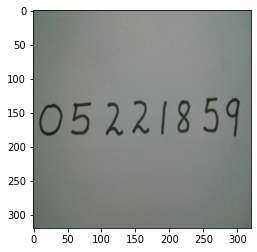

In [25]:
img = np.array(Image.open('test_img4.jpg').convert("RGB").resize((320,320)))
plt.imshow(img)

## Convert ภาพ RGB ให้เป็น Grayscale

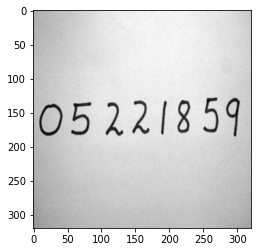

In [26]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img2, cmap="gray")

In [27]:
image = np.zeros((320,320,3), dtype = np.uint8)

for r in range(image.shape[0]):
    for c in range(image.shape[1]):
        
        image[r, c, 0] = img2[r, c]
        image[r, c, 1] = img2[r, c]
        image[r, c, 2] = img2[r, c]

In [28]:
image.shape

(320, 320, 3)

## โหลด Model Tflite ที่เราเซฟไว้

In [31]:
tflite_model_file = 'model/model.tflite'

In [32]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)

In [33]:
interpreter.allocate_tensors()

In [34]:
input_details = interpreter.get_input_details()

In [35]:
output_details = interpreter.get_output_details()

In [36]:
interpreter.set_tensor(input_details[0]['index'], image.reshape(1, 320, 320, 3))

In [37]:
interpreter.invoke()

## ตำแหน่งของแต่ละ Boundingbox

## แต่ละ Bounding box ทำนายเป็นอะไร

## ความน่าจะเป็นของแต่ล bb

In [38]:
detection_boxes = interpreter.get_tensor(output_details[0]['index'])
print(detection_boxes)

[[[ 4.15191114e-01  3.25786889e-01  5.79640448e-01  4.15078342e-01]
  [ 4.12233710e-01  1.73180789e-01  5.78631520e-01  2.73633927e-01]
  [ 3.89218032e-01  7.76254475e-01  5.69916785e-01  8.54695022e-01]
  [ 4.08221304e-01  4.51345384e-01  5.70745051e-01  5.37536740e-01]
  [ 3.95884156e-01  8.83888423e-01  5.83082199e-01  9.56976831e-01]
  [ 4.25978452e-01  2.36985758e-02  5.84718347e-01  1.39402509e-01]
  [ 4.09344316e-01  6.55212760e-01  5.68803787e-01  7.26083398e-01]
  [ 4.07443792e-01  5.79866767e-01  5.70704281e-01  6.26244903e-01]
  [ 4.18546081e-01  3.53229165e-01  5.70323348e-01  4.64968681e-01]
  [ 4.34234202e-01  5.70542097e-01  5.73303163e-01  6.11953735e-01]
  [ 1.68214589e-01 -8.39352608e-04  9.66406345e-01  1.04571295e+00]
  [ 4.47003424e-01  7.71606505e-01  5.53791463e-01  8.37492406e-01]
  [ 4.33885932e-01  8.62479627e-01  5.33612847e-01  9.53076184e-01]
  [ 3.87911618e-01  8.46566260e-01  5.72082818e-01  9.28419888e-01]
  [ 4.36202526e-01  1.60736486e-01  5.40740430e-

In [39]:
detection_classes = interpreter.get_tensor(output_details[1]['index'])
print(detection_classes)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


In [40]:
detection_scores = interpreter.get_tensor(output_details[2]['index'])
print(detection_scores)

[[0.83984375 0.83203125 0.82421875 0.81640625 0.80859375 0.76953125
  0.73828125 0.3203125  0.1015625  0.0703125  0.05859375 0.046875
  0.046875   0.04296875 0.04296875 0.03515625 0.03515625 0.03125
  0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
  0.03125   ]]


## สร้าง Bounding box เพื่อทดสอบ

In [41]:
def draw_rect(image, box):
    h, w, c = image.shape
    y_min = int(max(1, (box[0] * h)))
    x_min = int(max(1, (box[1] * w)))
    y_max = int(min(h, (box[2] * h)))
    x_max = int(min(w, (box[3] * w)))

    # draw a rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 4)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


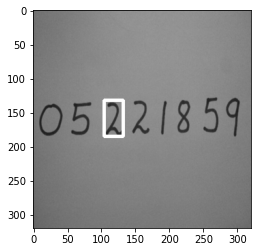

In [42]:
draw_rect(image, detection_boxes[0, 0])
print(detection_classes)
plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


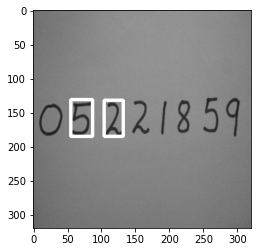

In [43]:
draw_rect(image, detection_boxes[0, 1])
print(detection_classes)

plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


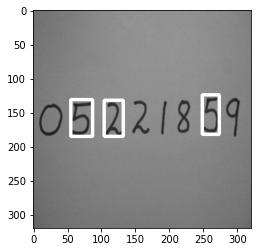

In [44]:
draw_rect(image, detection_boxes[0, 2])
print(detection_classes)

plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


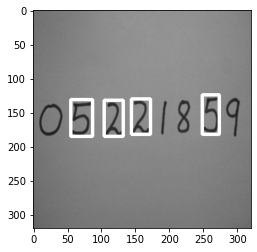

In [45]:
draw_rect(image, detection_boxes[0, 3])
print(detection_classes)

plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


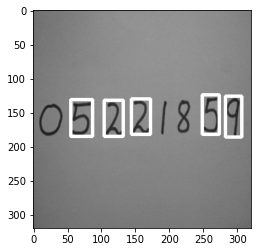

In [46]:
draw_rect(image, detection_boxes[0, 4])
print(detection_classes)

plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


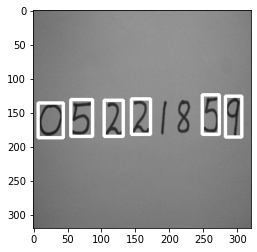

In [47]:
draw_rect(image, detection_boxes[0, 5])
print(detection_classes)

plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


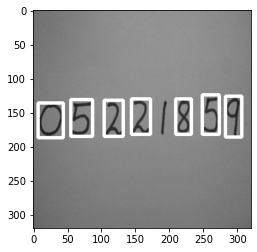

In [48]:
draw_rect(image, detection_boxes[0, 6])
print(detection_classes)

plt.imshow(image)

[[2. 5. 5. 2. 9. 0. 8. 1. 2. 1. 2. 5. 9. 5. 5. 8. 9. 2. 2. 2. 8. 2. 5. 1.
  2.]]


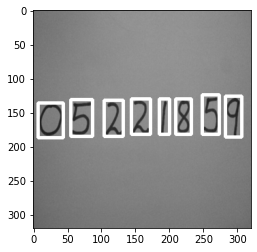

In [49]:
draw_rect(image, detection_boxes[0, 7])
print(detection_classes)

plt.imshow(image)